## Homework #12 - Clustering Algorithms. KMeans. DBSCAN. Agglomerative Clustering

### Overview:
You already got to know the clustering problem in Machine Learning.
Also, you met one of the business problems where these algorithms are
used - customer segmentation. Today you are going to practice this
knowledge on a very similar task.

### Task:
For this chapter, you will have to do the following:
* Bring all columns into a numeric form: applying mapping or dummy
variables.
* If you think it can be helpful, you may apply feature scaling.
* Using Silhouette score, find the best number of clusters for KMeans
(implemented in sklearn.)
* Using Silhouette score, find the best number of clusters for DBSCAN
(implemented in sklearn.)
* Using Silhouette score, find the best number of clusters for Agglomerative Clustering
(implemented in sklearn.)
* Plot the process of choosing the best number of clusters for each
algorithm and try to explain.
* Cluster the Data Set using all 3 algorithms.
* Extract from the KMeans algorithm the centroids.
* Extract from DBSCAN the medoids of the clusters.
* Extract from Agglomerative Clustering the means of the clusters
* Build the following table for both algorithms, and fill the table with
the means of the clusters.

<div align="center">

|           | feature_1 | feature_2 | ... | feature m |
|:---------:|:---------:|:---------:|:---:|:---------:|
| cluster 1 |           |           |     |           |
| cluster 2 |           |           |     |           |
|    ...    |           |           |     |           |
| cluster n |           |           |     |           |

</div>

* Make a conclusion based on the table you got and create an imaginary customer for every cluster.


In [2]:
import numpy as np
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer

I decided to work with Customer Personality Dataset, since it contains more complex data than other datasets presented for usage.

In [3]:
customer_personality_dataset = pd.read_csv('dataset/marketing_campaign.csv', sep='\t')

In [4]:
customer_personality_dataset.head(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
customer_personality_dataset.tail(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### Data Cleaning

In [6]:
customer_personality_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

For the start, I decided to get rid of `ID` column since it is irrelevant for model training. Also, I decided to drop another 2 columns - `Z_CostContact` and `Z_Revenue`, since I could not find some information about what these columns mean.

In [7]:
customer_personality_dataset.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
customer_personality_dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [8]:
object_columns = customer_personality_dataset.select_dtypes(include=['object']).columns
print(f'Object Columns: {object_columns.to_list()}')
for column_name in object_columns:
    print(f"Column Name = {column_name}: Unique Values = {customer_personality_dataset[column_name].unique()}")

Object Columns: ['Education', 'Marital_Status', 'Dt_Customer']
Column Name = Education: Unique Values = ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Column Name = Marital_Status: Unique Values = ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Column Name = Dt_Customer: Unique Values = ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-20

As it may be seen, there are several object columns that contain categorical data, as well as one column with the Datetime data type. For `Marital_Status` column, I decided
to compress it into binary values — `In_Relationship` and `Single`, since most of them can be simplified to either one of these.

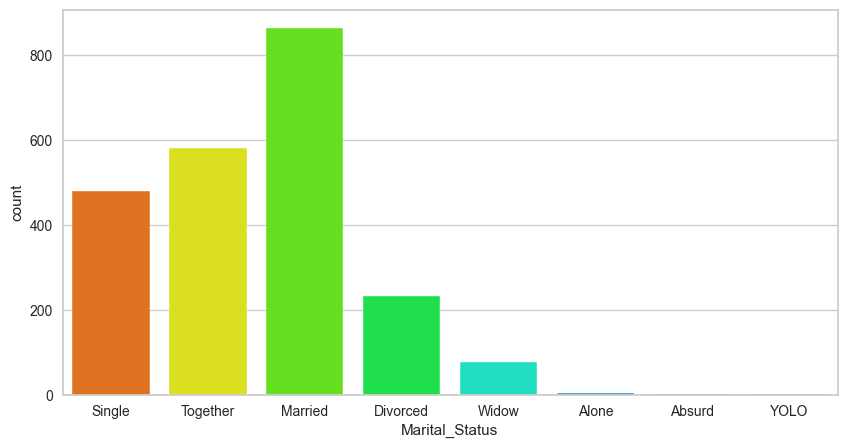

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_personality_dataset, x='Marital_Status', hue='Marital_Status', palette='gist_rainbow')
plt.show()

In [10]:
customer_personality_dataset['Marital_Status'] = customer_personality_dataset['Marital_Status'].apply(
    lambda status: 'In_Relationship' if status in ['Married', 'Together'] else 'Single'
)
customer_personality_dataset.rename({'Marital_Status': 'Relationship_Status'}, axis=1, inplace=True)

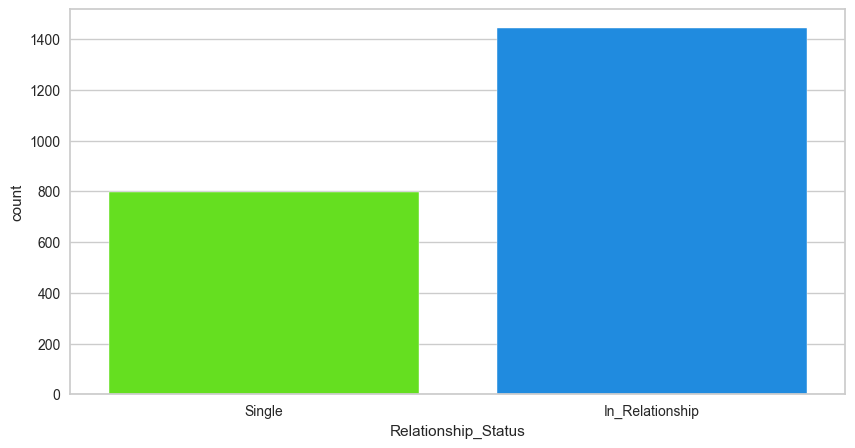

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_personality_dataset, x='Relationship_Status', hue='Relationship_Status', palette='gist_rainbow')
plt.show()

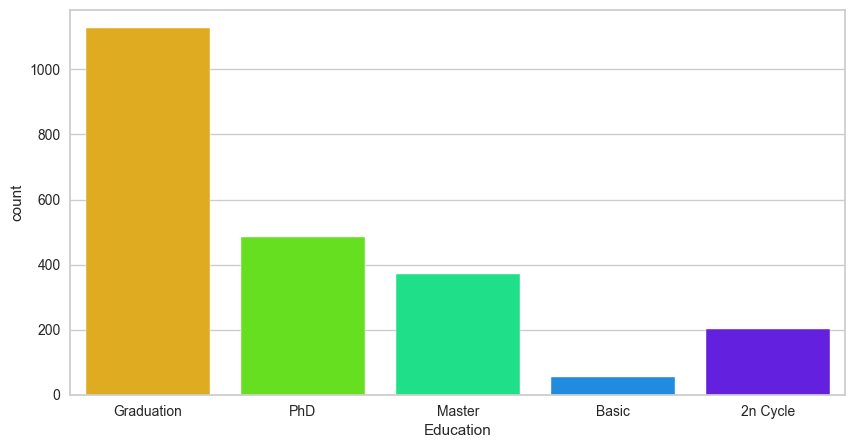

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_personality_dataset, x='Education', hue='Education', palette='gist_rainbow')
plt.show()

For the `Education` column, since all the degrees are coming ordered, I will use Ordinal Encoder further to encode this column.

In [13]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
customer_personality_dataset['Total_Spending'] = customer_personality_dataset[spending_columns].sum(axis=1)
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,1617
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,27
2,1965,Graduation,In_Relationship,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,776
3,1984,Graduation,In_Relationship,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,53
4,1981,PhD,In_Relationship,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,13-06-2013,46,709,43,...,4,5,0,0,0,0,0,0,0,1341
2236,1946,PhD,In_Relationship,64014.0,2,1,10-06-2014,56,406,0,...,5,7,0,0,0,1,0,0,0,444
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,13,6,0,1,0,0,0,0,0,1241
2238,1956,Master,In_Relationship,69245.0,0,1,24-01-2014,8,428,30,...,10,3,0,0,0,0,0,0,0,843


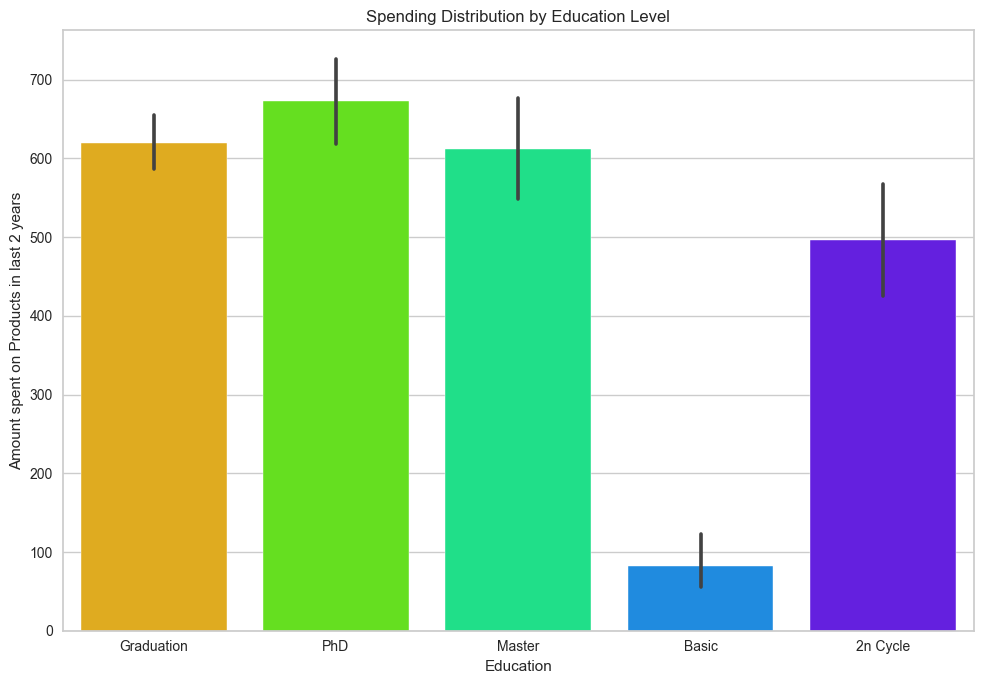

In [14]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=customer_personality_dataset,
    x='Education',
    hue='Education',
    y=customer_personality_dataset[spending_columns].sum(axis=1),
    palette='gist_rainbow'
)

plt.title('Spending Distribution by Education Level')
plt.ylabel('Amount spent on Products in last 2 years')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9252\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9252\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9252\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9252\4028882526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

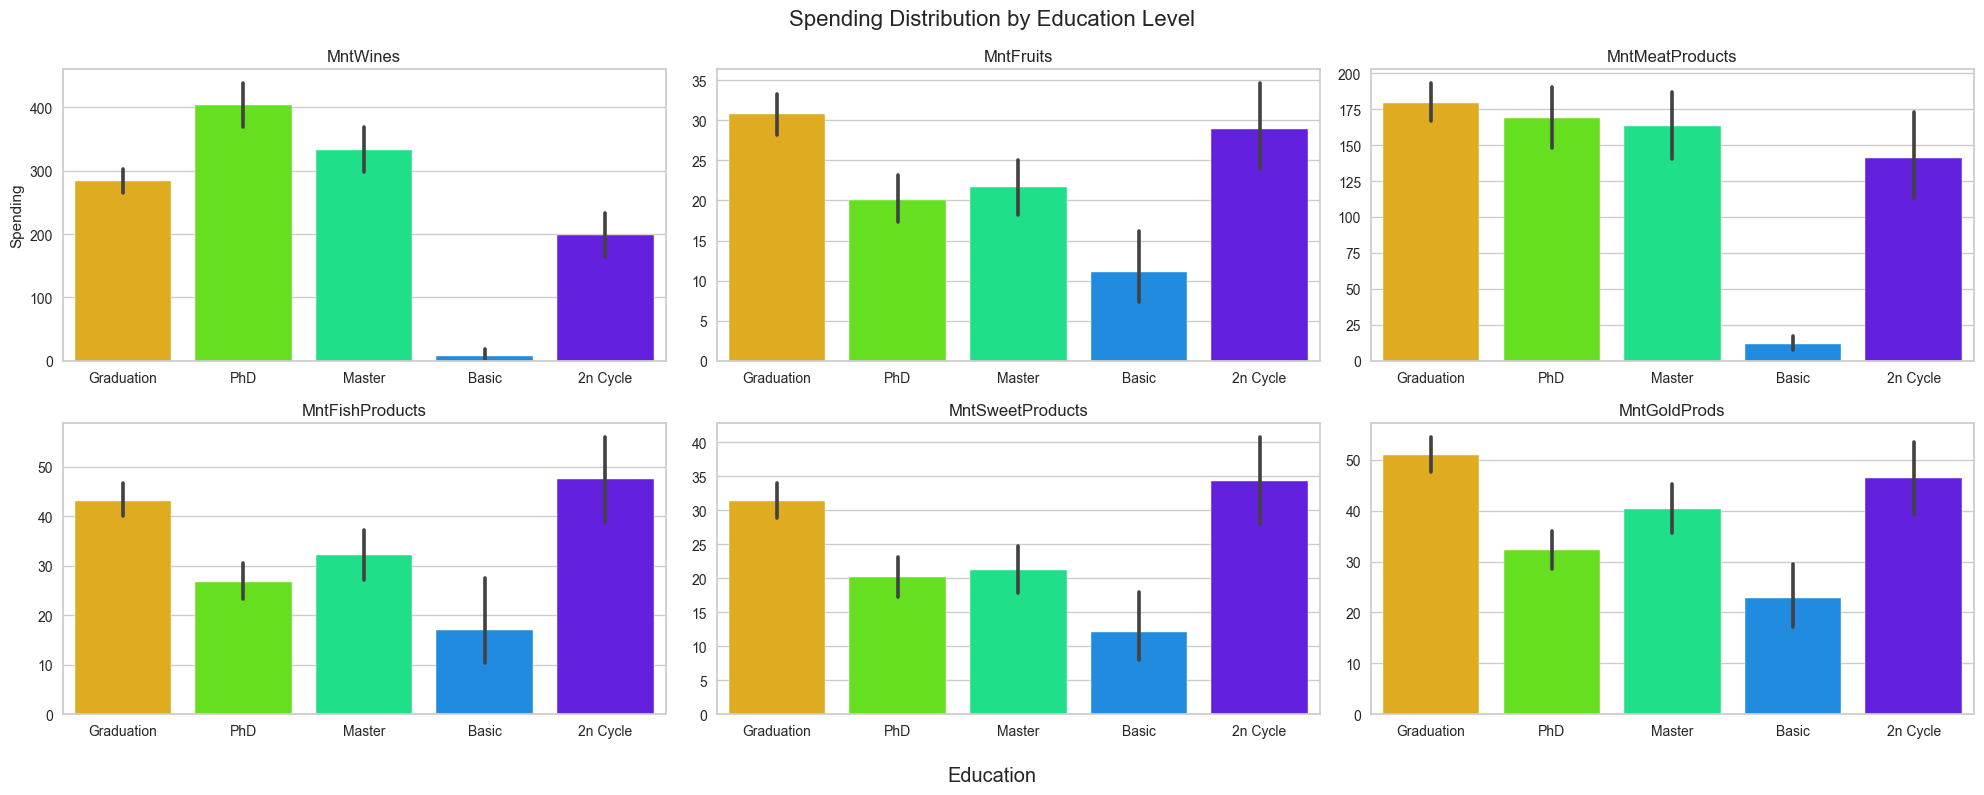

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(spending_columns):
    sns.barplot(
        data=customer_personality_dataset,
        x='Education',
        y=col,
        palette='gist_rainbow',
        ax=axes[i]
    )
    axes[i].set_title(spending_columns[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Spending' if i == 0 else '')

fig.suptitle('Spending Distribution by Education Level', fontsize=16)
fig.supxlabel('Education')
plt.tight_layout()
plt.show()


As it may be seen, most amount on products is spent by people with higher Education Degree, with a slight difference between them and a big difference compared to Basic
Education Degree.

In [16]:
purchases_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
customer_personality_dataset['Total_Purchases'] = customer_personality_dataset[purchases_columns].sum(axis=1)
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,1617,22
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,27,4
2,1965,Graduation,In_Relationship,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,776,20
3,1984,Graduation,In_Relationship,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,53,6
4,1981,PhD,In_Relationship,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,422,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,0,1341,16
2236,1946,PhD,In_Relationship,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,0,444,15
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,0,1241,18
2238,1956,Master,In_Relationship,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,0,843,21


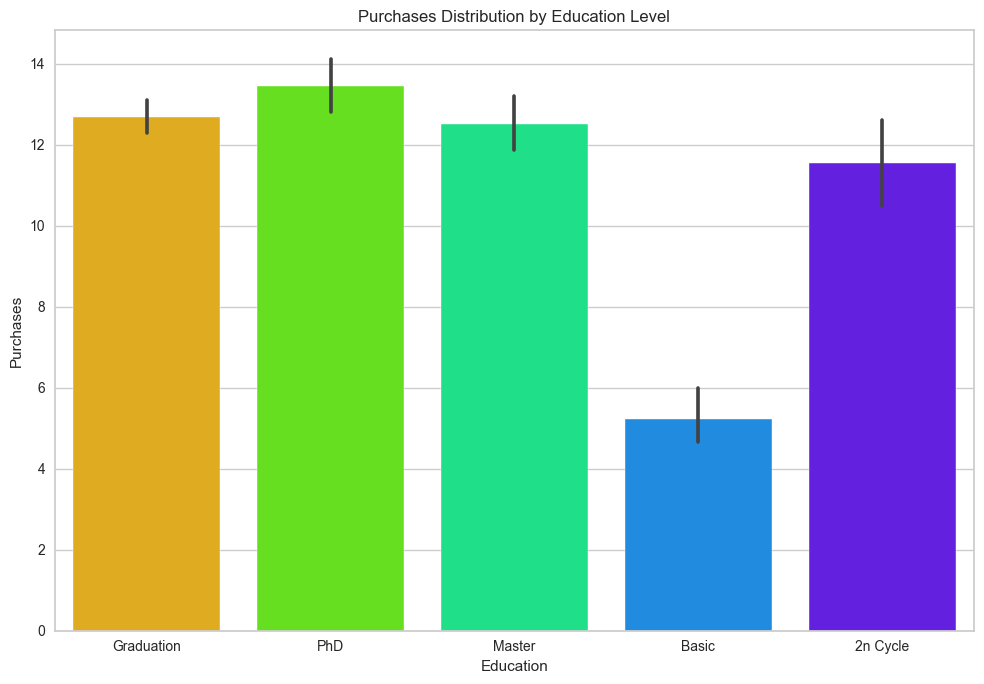

In [17]:
plt.figure(figsize=(10, 7))

sns.barplot(
    data=customer_personality_dataset,
    x='Education',
    hue='Education',
    y=customer_personality_dataset[purchases_columns].sum(axis=1),
    palette='gist_rainbow'
)

plt.title('Purchases Distribution by Education Level')
plt.ylabel('Purchases')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9252\3588145138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9252\3588145138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_9252\3588145138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


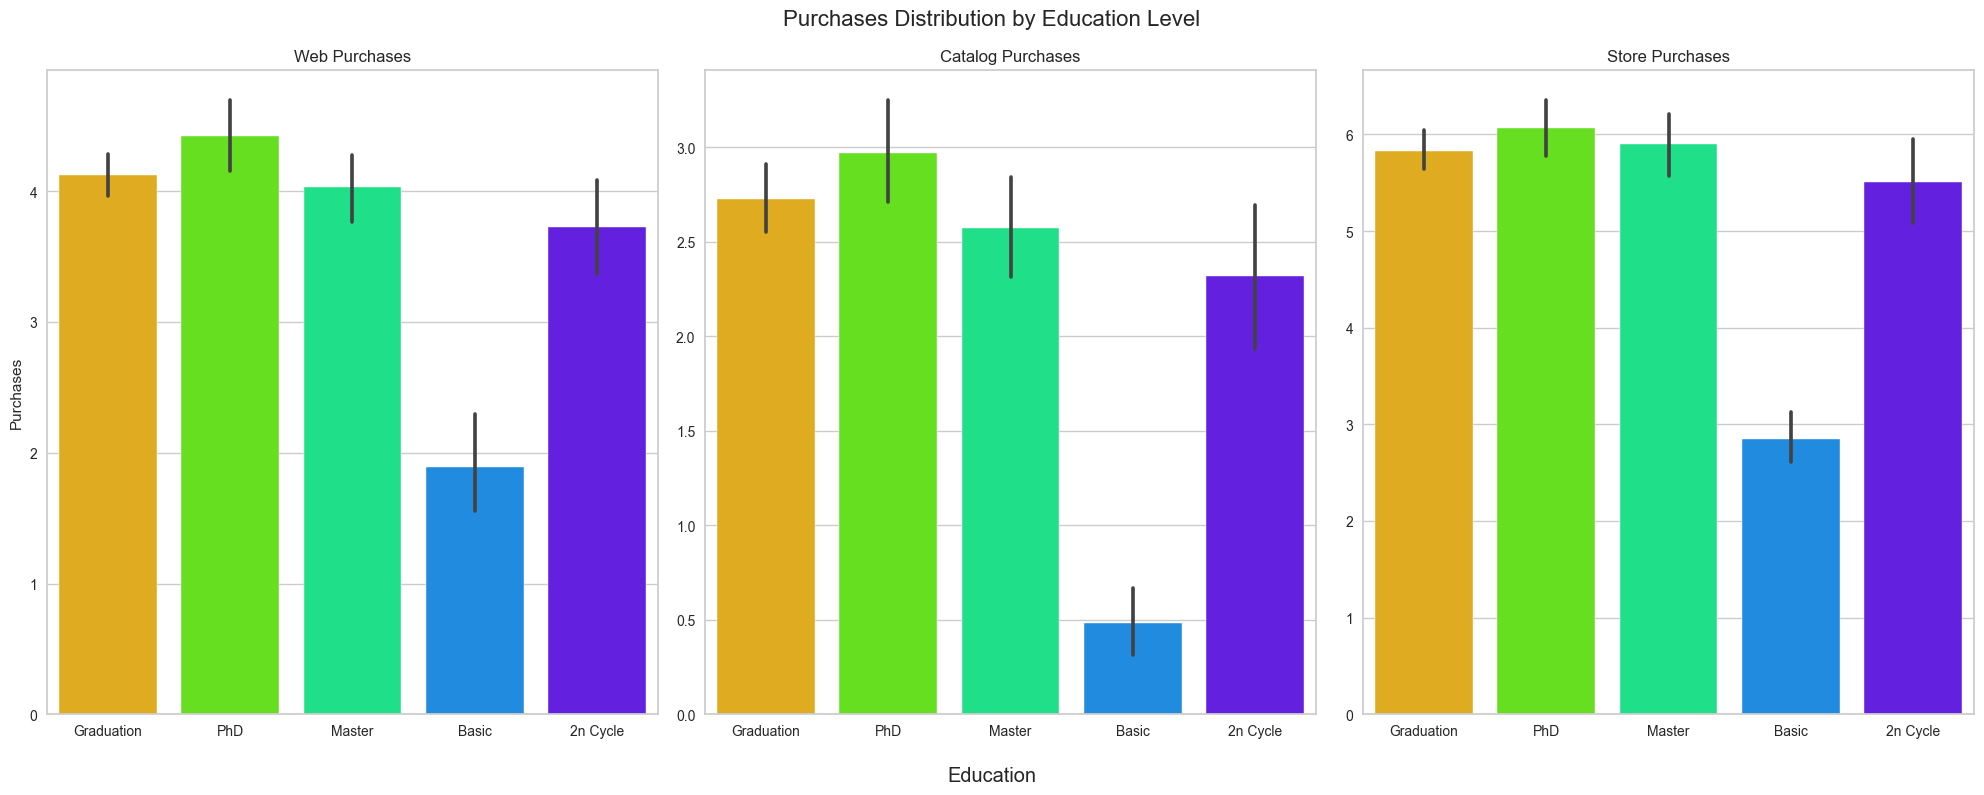

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

titles = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for i, col in enumerate(purchases_columns):
    sns.barplot(
        data=customer_personality_dataset,
        x='Education',
        y=col,
        palette='gist_rainbow',
        ax=axes[i]
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Purchases' if i == 0 else '')

fig.suptitle('Purchases Distribution by Education Level', fontsize=16)
fig.supxlabel('Education')
plt.tight_layout()
plt.show()


Next, I will combine columns related to children - `Kidhome` and `Teenhome`.

In [19]:
children_columns = ['Kidhome', 'Teenhome']
customer_personality_dataset['Total_Children'] = customer_personality_dataset[children_columns].sum(axis=1)
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,1617,22,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,27,4,2
2,1965,Graduation,In_Relationship,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,776,20,0
3,1984,Graduation,In_Relationship,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,53,6,1
4,1981,PhD,In_Relationship,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,0,1341,16,1
2236,1946,PhD,In_Relationship,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,0,444,15,3
2237,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,0,1241,18,0
2238,1956,Master,In_Relationship,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,0,843,21,1


For `Dt_Customer` column, which is the Date of Customer's enrollment with the company, I decided to use a predefined Latest date that will be useful when creating a new
column, which will be the Loyalty of Customers. In other words, it will mark the Tenure of the customer for the company. Also, it will be useful for establishing the age of
the customers.

In [20]:
customer_personality_dataset['Dt_Customer'] = pd.to_datetime(customer_personality_dataset['Dt_Customer'], format = '%d-%m-%Y')
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,1,1617,22,0
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,0,27,4,2
2,1965,Graduation,In_Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,0,776,20,0
3,1984,Graduation,In_Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,0,53,6,1
4,1981,PhD,In_Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,0,422,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,0,1341,16,1
2236,1946,PhD,In_Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,1,0,0,0,444,15,3
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,0,1241,18,0
2238,1956,Master,In_Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,0,843,21,1


In [21]:
latest_date = customer_personality_dataset['Dt_Customer'].max() + pd.offsets.YearBegin(1)
latest_date

Timestamp('2015-01-01 00:00:00')

In [22]:
customer_personality_dataset['Customer_Tenure'] = (latest_date - customer_personality_dataset['Dt_Customer']).dt.days
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,1617,22,0,849
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,27,4,2,299
2,1965,Graduation,In_Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,776,20,0,498
3,1984,Graduation,In_Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,53,6,1,325
4,1981,PhD,In_Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,422,14,1,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,1341,16,1,567
2236,1946,PhD,In_Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,0,1,0,0,0,444,15,3,205
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,1,0,0,0,0,0,1241,18,0,341
2238,1956,Master,In_Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,843,21,1,342


In [23]:
customer_personality_dataset['Age'] = latest_date.year - customer_personality_dataset['Year_Birth']
customer_personality_dataset

,Year_Birth,Education,Relationship_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,Graduation,In_Relationship,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,Graduation,In_Relationship,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,PhD,In_Relationship,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,In_Relationship,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,PhD,In_Relationship,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,Graduation,Single,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,Master,In_Relationship,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


### Data Preprocessing

Next, I will use One-Hot Encoder to replace the column with a single binary-valued column `Is_Single` for column `Relationship_Status`, to avoid the Dummy Variable Trap.

In [24]:
customer_personality_dataset['Relationship_Status'] = customer_personality_dataset['Relationship_Status'].map({'Single': 1, 'In_Relationship': 0})
customer_personality_dataset.rename(columns={'Relationship_Status': 'Is_Single'}, inplace=True)
customer_personality_dataset

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,Graduation,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,Graduation,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,Graduation,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,Graduation,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,PhD,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,PhD,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,Graduation,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,Master,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


Next, I will encode `Education` column using Ordinal Encoder.

In [25]:
customer_personality_dataset['Education'] = customer_personality_dataset['Education'].map(
    {
        'Basic': 0,
        '2n Cycle': 1,
        'Graduation': 2,
        'Master': 3,
        'PhD': 4
    }
)
customer_personality_dataset

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,2,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,2,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,2,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,4,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,2,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,3,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [26]:
print(customer_personality_dataset.isnull().sum())

Year_Birth              0
Education               0
Is_Single               0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Total_Spending          0
Total_Purchases         0
Total_Children          0
Customer_Tenure         0
Age                     0
dtype: int64


There are several Null values in column `Income`, which means that I should impute those values.

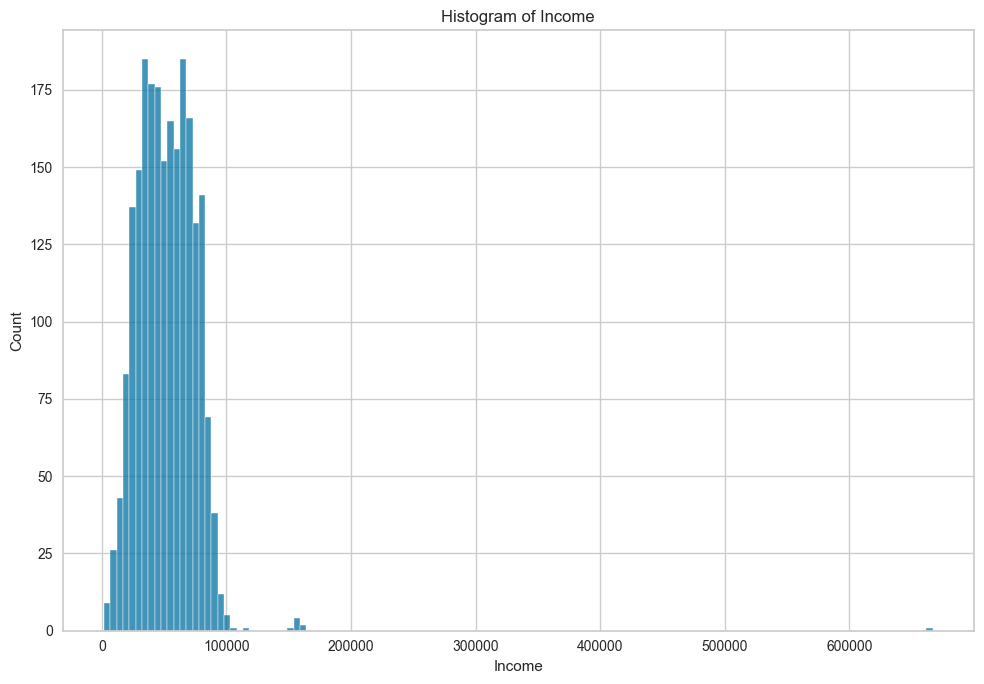

In [27]:
plt.figure(figsize=(10, 7))

sns.histplot(
    data=customer_personality_dataset,
    x='Income'
)

plt.title('Histogram of Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

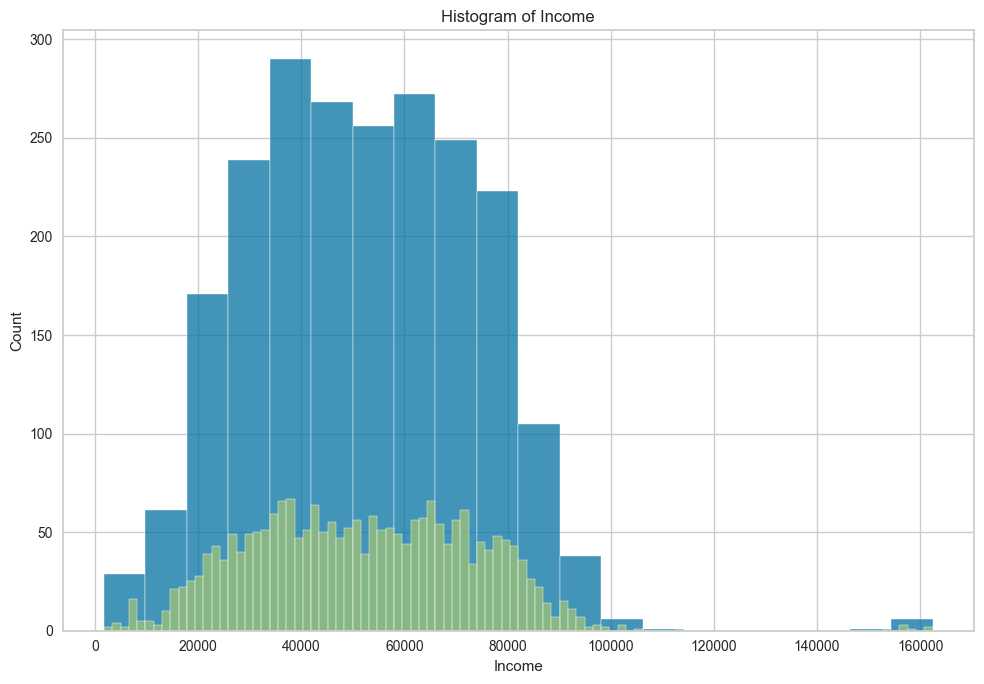

In [28]:
plt.figure(figsize=(10, 7))

sns.histplot(
    data=customer_personality_dataset[customer_personality_dataset['Income'] < 200000]['Income'],
    bins=20
)

sns.histplot(
    data=customer_personality_dataset[customer_personality_dataset['Income'] < 200000]['Income'],
    bins=100
)

plt.title('Histogram of Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

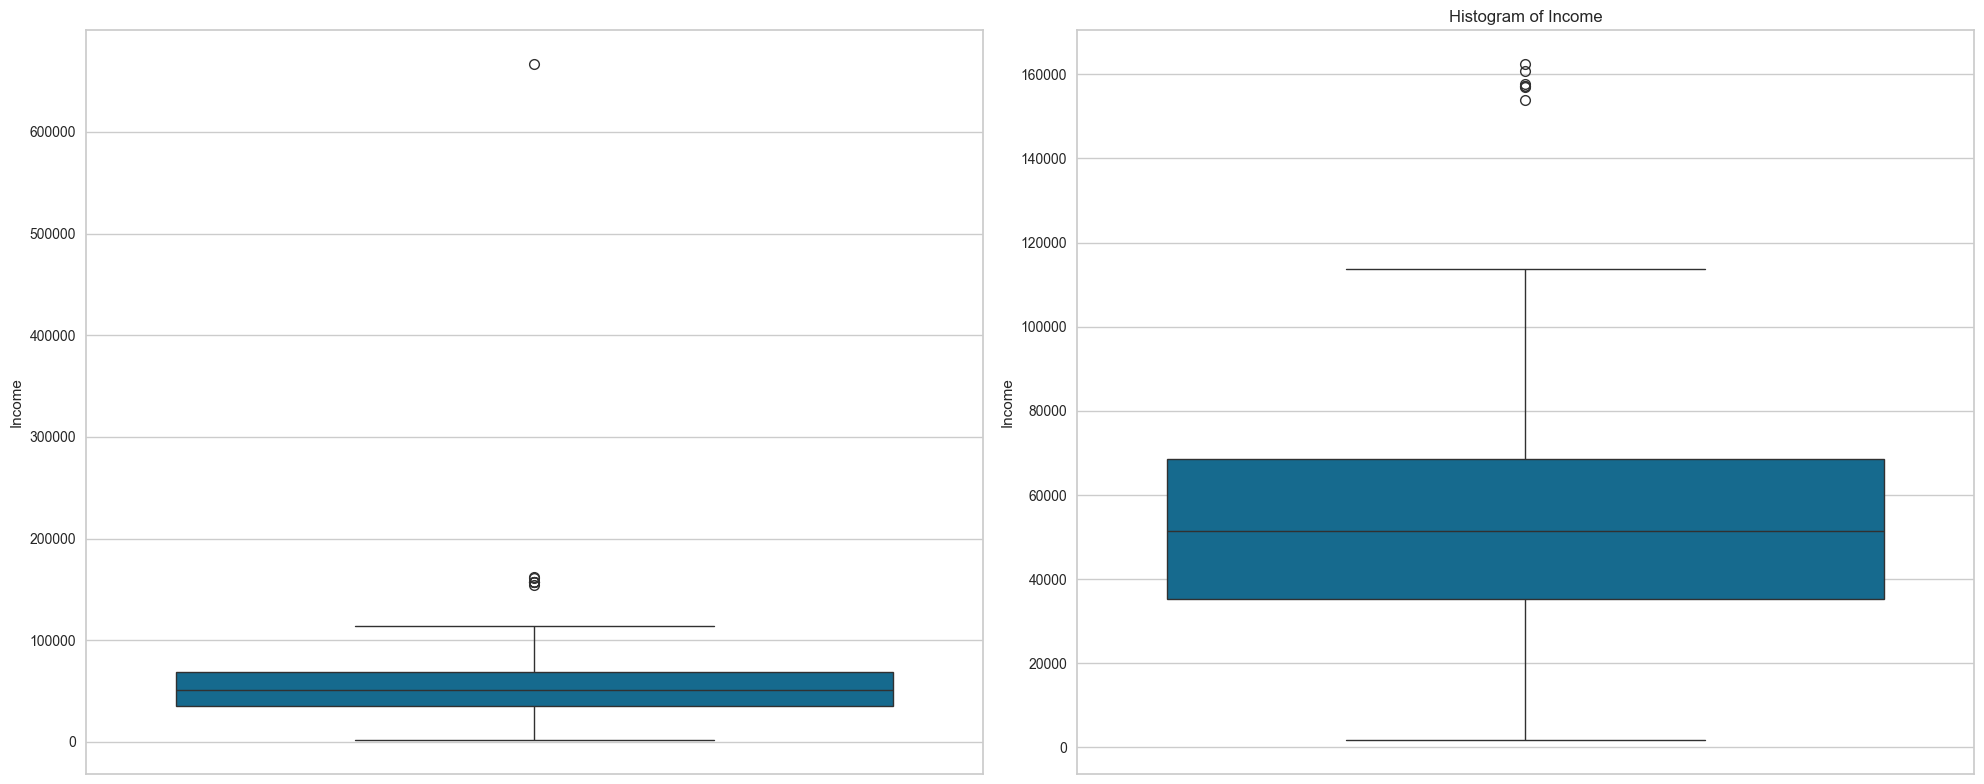

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(
    data=customer_personality_dataset['Income'],
    ax=axes[0]
)

sns.boxplot(
    data=customer_personality_dataset[customer_personality_dataset['Income'] <= 200000]['Income'],
    ax=axes[1]
)

plt.title('Histogram of Income')
plt.tight_layout()
plt.show()

Since there are outliers, I will impute Income with median value.

In [30]:
customer_personality_dataset['Income'] = customer_personality_dataset['Income'].fillna(customer_personality_dataset['Income'].median())

In [31]:
customer_personality_dataset_orig_copy = customer_personality_dataset.copy()
customer_personality_dataset_orig_copy

,Year_Birth,Education,Is_Single,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,1957,2,1,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,1617,22,0,849,58
1,1954,2,1,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,27,4,2,299,61
2,1965,2,0,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,776,20,0,498,50
3,1984,2,0,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,53,6,1,325,31
4,1981,4,0,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,0,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,1341,16,1,567,48
2236,1946,4,0,64014.0,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,444,15,3,205,69
2237,1981,2,1,56981.0,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,1241,18,0,341,34
2238,1956,3,0,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,843,21,1,342,59


In [32]:
print(customer_personality_dataset.isnull().sum())

Year_Birth             0
Education              0
Is_Single              0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Total_Spending         0
Total_Purchases        0
Total_Children         0
Customer_Tenure        0
Age                    0
dtype: int64


I selected engineered and some of the original dataset features in order to avoid the multicollinearity problem and to reduce the dimensionality of the dataset.

In [33]:
selected_features = ['Education', 'Is_Single', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'Total_Children', 'Customer_Tenure', 'Age']
customer_personality_dataset = customer_personality_dataset[selected_features]
customer_personality_dataset

,Education,Is_Single,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,2,1,58138.0,58,1617,22,0,849,58
1,2,1,46344.0,38,27,4,2,299,61
2,2,0,71613.0,26,776,20,0,498,50
3,2,0,26646.0,26,53,6,1,325,31
4,4,0,58293.0,94,422,14,1,347,34
...,...,...,...,...,...,...,...,...,...
2235,2,0,61223.0,46,1341,16,1,567,48
2236,4,0,64014.0,56,444,15,3,205,69
2237,2,1,56981.0,91,1241,18,0,341,34
2238,3,0,69245.0,8,843,21,1,342,59


Next, I will scale the features since I will be using PCA to visualize the data better further.

In [34]:
standard_scaler = StandardScaler()
customer_personality_scaled_features = pd.DataFrame(data=standard_scaler.fit_transform(customer_personality_dataset.drop(columns=['Education', 'Is_Single'])),
                                                    index=customer_personality_dataset.drop(columns=['Education', 'Is_Single']).index,
                                                    columns=customer_personality_dataset.drop(columns=['Education', 'Is_Single']).columns)
customer_personality_scaled_features.describe()

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,-4.361590e-17,-3.172066e-18,3.647876e-17,-1.118153e-16,4.123686e-17,-2.743837e-16,-1.681195e-16
std,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-2.017707e+00,-1.696001e+00,-9.978133e-01,-1.740259e+00,-1.264505e+00,-1.749736e+00,-2.269702e+00
25%,-6.671053e-01,-8.671566e-01,-8.919365e-01,-9.074033e-01,-1.264505e+00,-8.552770e-01,-6.839101e-01
50%,-3.421472e-02,-3.777284e-03,-3.484355e-01,-7.454799e-02,6.592771e-02,9.490706e-03,-9.967091e-02
75%,6.412408e-01,8.596020e-01,7.302623e-01,7.583074e-01,6.592771e-02,8.680727e-01,8.184192e-01
max,2.454534e+01,1.722981e+00,3.187435e+00,2.701637e+00,2.726794e+00,1.709335e+00,6.326960e+00


In [35]:
customer_personality_scaled_features = pd.concat([customer_personality_scaled_features, customer_personality_dataset[['Education', 'Is_Single']]], axis=1)
customer_personality_scaled_features

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,0.235696,0.307039,1.679417,1.313544,-1.264505,1.531185,0.985345,2,1
1,-0.235454,-0.383664,-0.961275,-1.185022,1.396361,-1.190545,1.235733,2,1
2,0.773999,-0.798086,0.282673,1.035926,-1.264505,-0.205773,0.317643,2,0
3,-1.022355,-0.798086,-0.918094,-0.907403,0.065928,-1.061881,-1.268149,2,0
4,0.241888,1.550305,-0.305254,0.203070,0.065928,-0.953012,-1.017761,4,0
...,...,...,...,...,...,...,...,...,...
2235,0.358936,-0.107383,1.221032,0.480689,0.065928,0.135680,0.150717,2,0
2236,0.470432,0.237969,-0.268717,0.341880,2.726794,-1.655713,1.903435,4,0
2237,0.189476,1.446700,1.054951,0.758307,-1.264505,-0.982703,-1.017761,2,1
2238,0.679401,-1.419719,0.393948,1.174735,0.065928,-0.977755,1.068807,3,0


### Silhouette Score

#### Silhouette Score - KMeans
First model to be trained on this dataset is KMeans Algorithm. I used the implementation from the handbook of Silhouette Score plot.

In [36]:
final_dataset_copy = customer_personality_dataset.copy()

In [37]:
X = final_dataset_copy

In [38]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def draw_silhouette_plot(X, clusterer, n_clusters, ax):
    cluster_labels = clusterer.fit_predict(X, categorical=[0,1])
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    ax.set_xlim([-1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax.set_yticks([])
    ax.set_xticks(np.arange(-1, 1.1, 0.2))

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 1

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'The Silhouette Plot for n_clusters={n_clusters}')
    ax.legend([f'Cluster {i+1}' for i in range(
        n_clusters)] + ['Silhouette Score'])

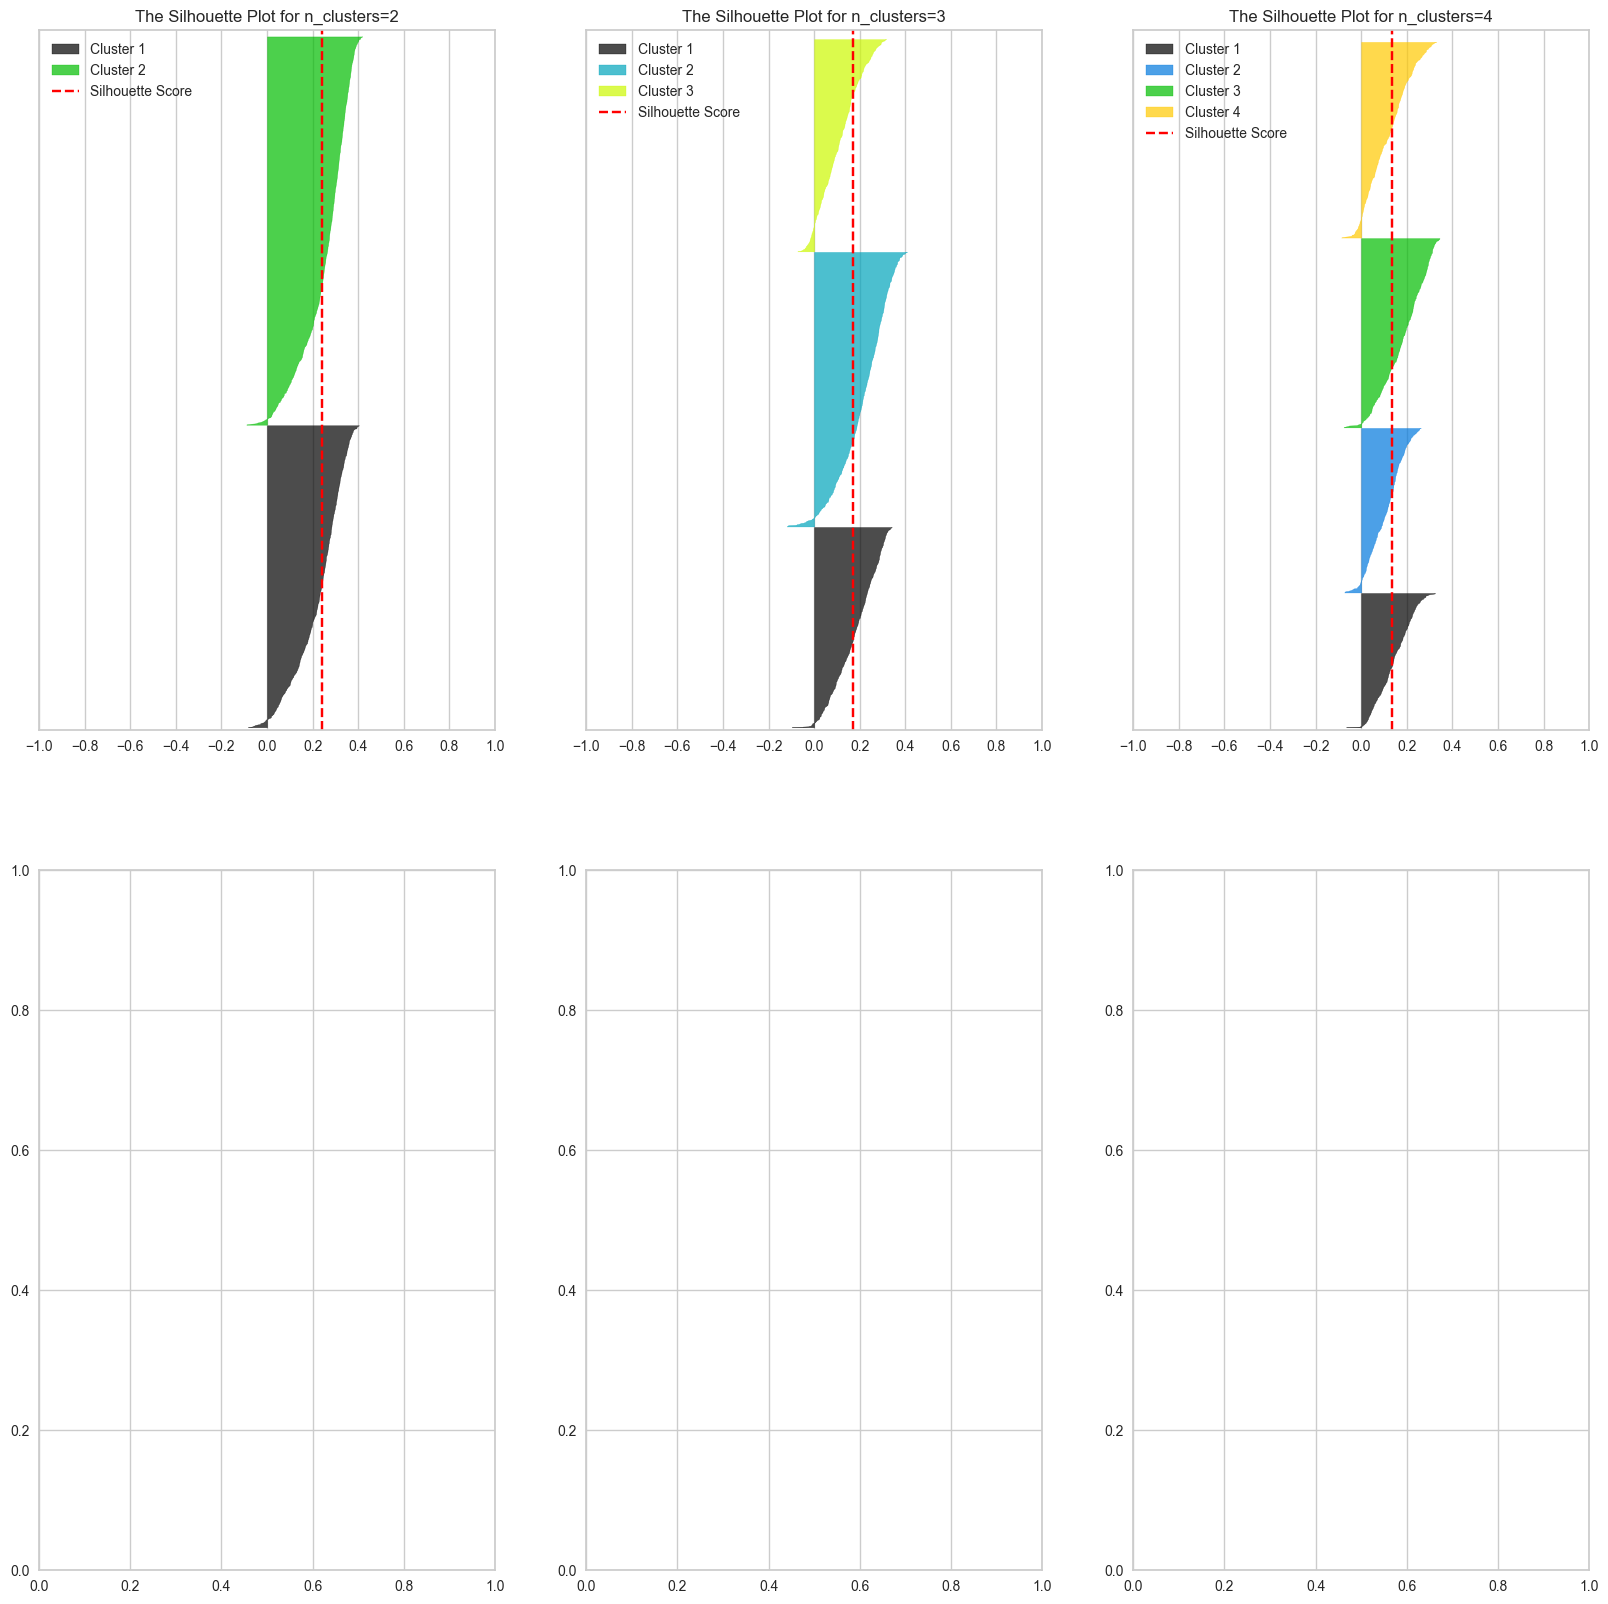

In [39]:
num_clusters_range = range(2, 5)
fig, axes = plt.subplots(2, 3, figsize=(20, 20))

for num_clusters_param in num_clusters_range:
    kmeans_model = KPrototypes(n_clusters=num_clusters_param, n_init=10, random_state=69)
    ax = axes[(num_clusters_param - 2) // 3][(num_clusters_param - 2) % 3]
    draw_silhouette_plot(customer_personality_scaled_features, kmeans_model, num_clusters_param, ax)

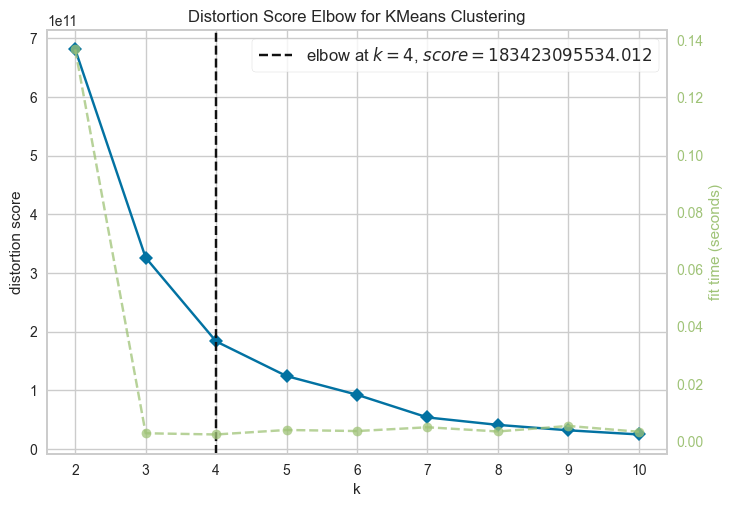

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
Elbow_M = KElbowVisualizer(KMeans(random_state=69), k=10)
Elbow_M.fit(X)
Elbow_M.show()

In [41]:
X = customer_personality_scaled_features
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [42]:
X_pca

array([[ 2.4308006 , -0.6975873 ],
       [-1.79376886,  1.3772798 ],
       [ 1.49762441, -0.44033382],
       ...,
       [ 1.2762346 , -1.16318284],
       [ 1.24916937,  1.33516411],
       [-0.77464953,  1.91974048]], shape=(2240, 2))

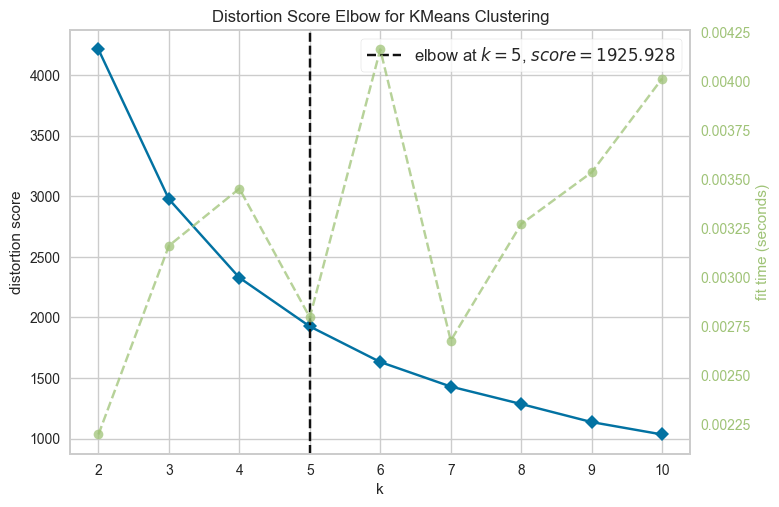

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

In [44]:
X_pca = customer_personality_scaled_features
X_pca

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,0.235696,0.307039,1.679417,1.313544,-1.264505,1.531185,0.985345,2,1
1,-0.235454,-0.383664,-0.961275,-1.185022,1.396361,-1.190545,1.235733,2,1
2,0.773999,-0.798086,0.282673,1.035926,-1.264505,-0.205773,0.317643,2,0
3,-1.022355,-0.798086,-0.918094,-0.907403,0.065928,-1.061881,-1.268149,2,0
4,0.241888,1.550305,-0.305254,0.203070,0.065928,-0.953012,-1.017761,4,0
...,...,...,...,...,...,...,...,...,...
2235,0.358936,-0.107383,1.221032,0.480689,0.065928,0.135680,0.150717,2,0
2236,0.470432,0.237969,-0.268717,0.341880,2.726794,-1.655713,1.903435,4,0
2237,0.189476,1.446700,1.054951,0.758307,-1.264505,-0.982703,-1.017761,2,1
2238,0.679401,-1.419719,0.393948,1.174735,0.065928,-0.977755,1.068807,3,0


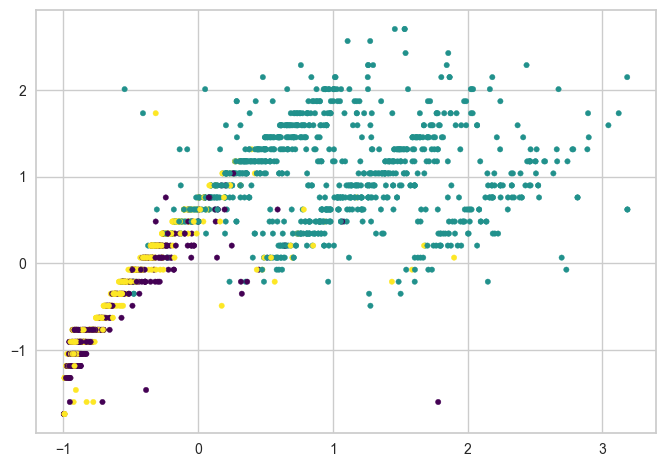

In [45]:
kmeans_model = KPrototypes(n_clusters=3, random_state=69)
kmeans_model.fit(X_pca, categorical=[0, 1])
ids = kmeans_model.predict(X_pca, categorical=[0, 1])
# centroids = kmeans_model.cluster_centers_

plt.scatter(X_pca.to_numpy()[:, 2], X_pca.to_numpy()[:, 3], c=ids, s=15, cmap='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

In [46]:
ids

array([1, 2, 1, ..., 1, 1, 2], shape=(2240,), dtype=uint16)

In [47]:
customer_personality_scaled_features.groupby(ids).mean()

,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age,Education,Is_Single
0,-0.692404,-0.021177,-0.745301,-0.787088,-0.015569,0.103700,-0.681482,1.736600,0.352221
1,0.725111,0.004828,1.029943,0.995912,-0.652060,0.161258,0.172166,2.564246,0.375419
2,-0.284443,0.013740,-0.628782,-0.545336,0.858035,-0.306419,0.420403,3.008671,0.332370


In [56]:
centers = customer_personality_scaled_features
# centers = pca.inverse_transform(centers)
centers = standard_scaler.inverse_transform(centers.drop(columns=['Education', 'Is_Single']))
# TODO: Visualization
df = pd.DataFrame(data=centers, columns=customer_personality_dataset.drop(columns=['Education', 'Is_Single']).columns)
df['Total_Spending']

0       1617.0
1         27.0
2        776.0
3         53.0
4        422.0
         ...  
2235    1341.0
2236     444.0
2237    1241.0
2238     843.0
2239     172.0
Name: Total_Spending, Length: 2240, dtype: float64

In [50]:
pd.DataFrame(data=customer_personality_scaled_features.groupby(ids).mean()[['Education', 'Is_Single']])

,Education,Is_Single
0,1.736600,0.352221
1,2.564246,0.375419
2,3.008671,0.332370


<Axes: ylabel='Total_Spending'>

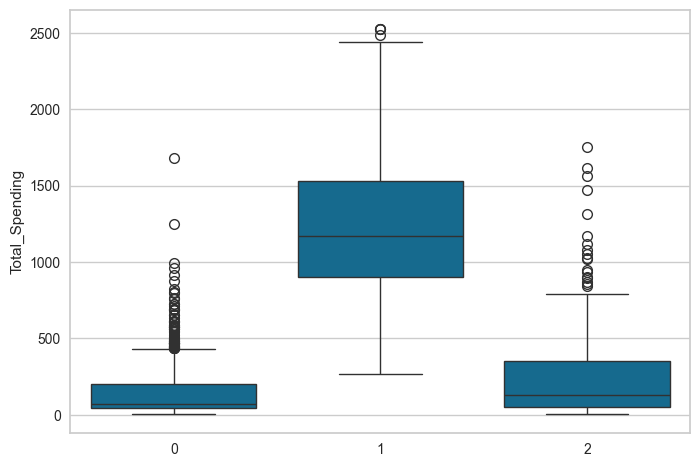

In [51]:
sns.boxplot(x=ids[df['Total_Spending'] <= 200000], y=df[df['Total_Spending'] <= 200000]['Total_Spending'])

Cluster Analysis:
1. Lowest Income, Low Total Spending, Lowest Total Purchases, 1 child in the family, Youngest Age Group, Graduated
2. Medium Income, Lowest Total Spending, Low Total Purchases, Higher probability of having at least a child or 2 children in the family, Old Age Group, Master
3. Highest Income, Highest Total Spending, Highest Total Purchases, No child in the family, Loyal to the company, Mid-Age Group, Graduated
4. High Income, High Total Spending, High Total Purchases, Probably 1 child in the family, Oldest Age Group, Master

#### Silhouette Score - Agglomerative Clustering

In [43]:
X = final_dataset_copy

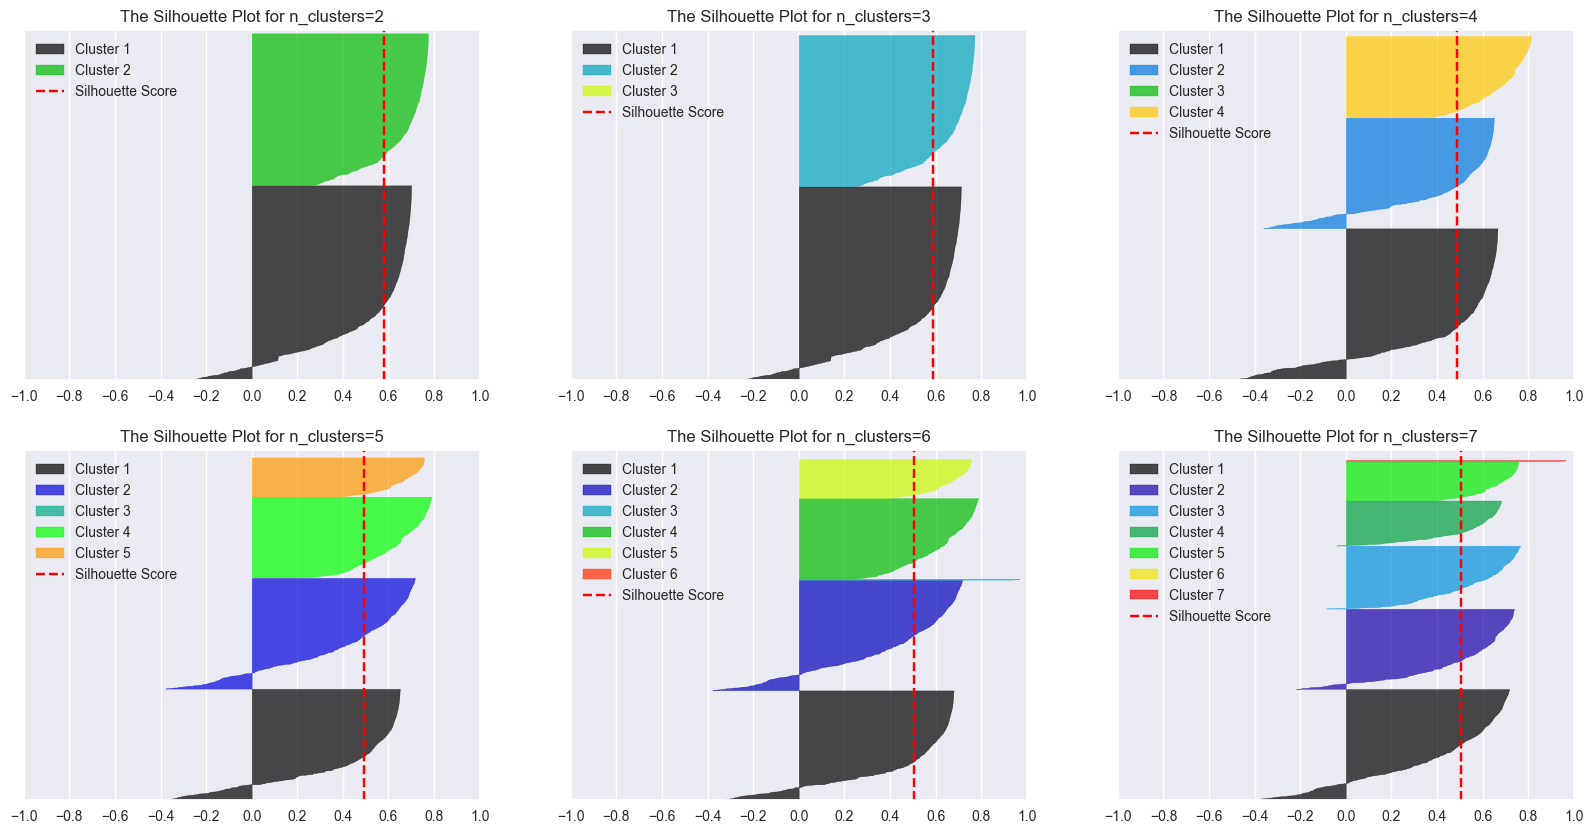

In [44]:
num_clusters_range = range(2, 8)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for num_clusters_param in num_clusters_range:
    agglomerative_clustering_model = AgglomerativeClustering(n_clusters=num_clusters_param)
    ax = axes[(num_clusters_param - 2) // 3][(num_clusters_param - 2) % 3]
    draw_silhouette_plot(X, agglomerative_clustering_model, num_clusters_param, ax)

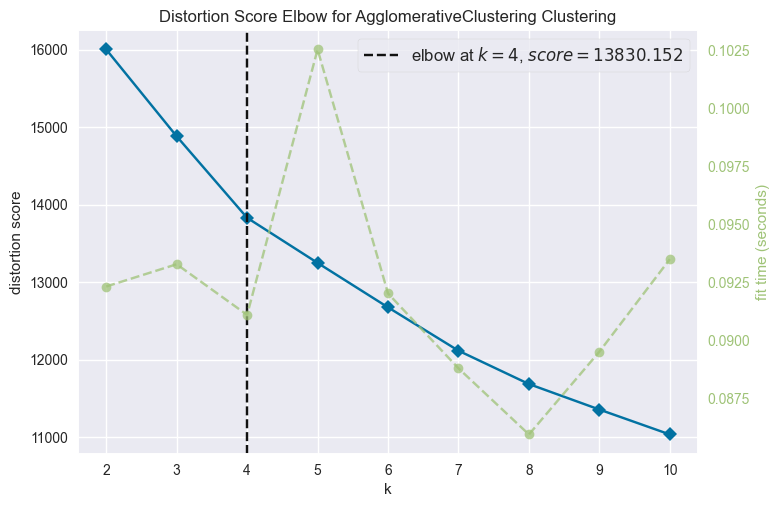

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [115]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

In [116]:
X = customer_personality_scaled_features
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

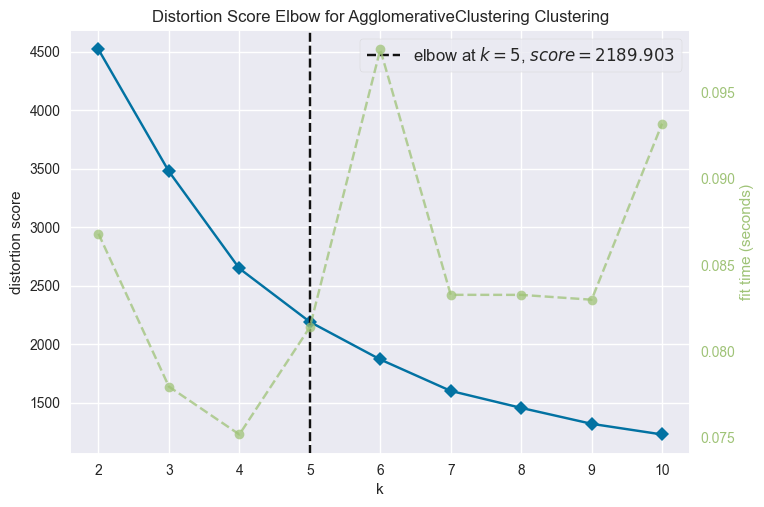

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

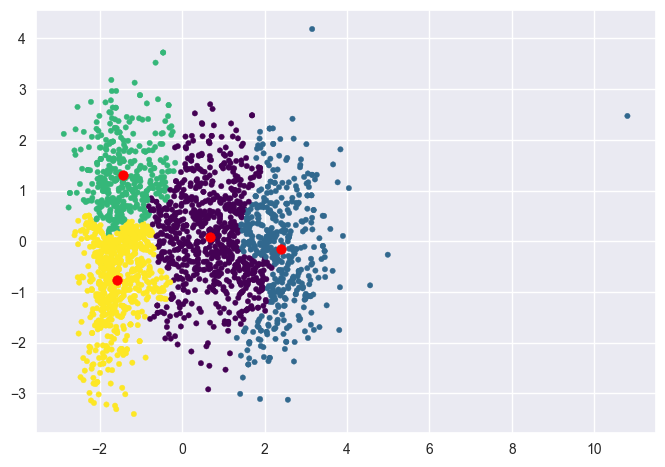

In [120]:
agg_model = AgglomerativeClustering(n_clusters=4)
ids = agg_model.fit_predict(X_pca)

centroids = np.array([
    X_pca[ids == i].mean(axis=0)
    for i in range(agg_model.n_clusters)
])

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ids, s=15, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

In [122]:
centroids

array([[ 0.68626293,  0.08491421],
       [ 2.39214747, -0.15554509],
       [-1.42290435,  1.31004094],
       [-1.58282279, -0.76254186]])

In [125]:
centers = centroids
centers = pca.inverse_transform(centers)
centers = standard_scaler.inverse_transform(centers)

pd.DataFrame(data=centers, columns=[column_name for column_name in final_dataset_copy if column_name in customer_personality_scaled_features.columns])

,Education,Is_Single,Income,Recency,Total_Spending,Total_Purchases,Total_Children,Customer_Tenure,Age
0,2.587611,0.358121,60820.548029,49.230026,834.031680,15.204597,0.794132,548.026855,47.832447
1,2.626992,0.373926,80724.986082,49.487569,1421.287814,21.847495,0.276877,594.962227,48.576080
2,3.108439,0.320216,39148.480435,48.998648,67.006878,6.966560,1.698110,436.685879,53.752796
3,1.818709,0.360199,30648.392014,48.777933,104.395510,6.399624,1.149462,552.665354,38.238087


Cluster Analysis:
1. High Income, High Total Spending, Relatively High Total Purchases, Most probably 1 child in the family, Relatively Old, Graduated or Master
2. Highest Income, Highest Total Spending, Highest Total Purchases, No children, Loyal to the Company, Relatively Old, Graduated or Master
3. Medium Income, Lowest Total Spending, Low Total Purchases, Higher probability of having at least a child or 2 children in the family, Old Age Group, Master
4. Lowest Income, Low Total Spending, Lowest Total Purchases, Most Probably 1 child in the family, Youngest Age Group, Graduated

#### Silhouette Score - DBSCAN

In [141]:
X = final_dataset_copy

In [145]:
X = customer_personality_scaled_features
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [146]:
# X_pca = final_dataset_copy[['Income', 'Total_Spending']].to_numpy()

In [149]:
X_pca = customer_personality_scaled_features

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: >

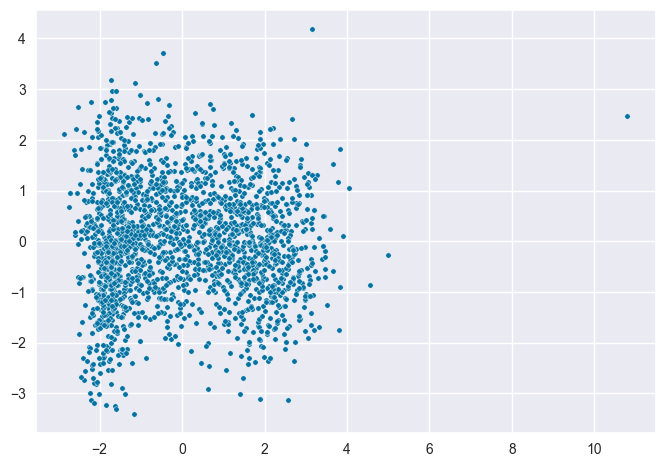

In [148]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=15, cmap='viridis')

In [144]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

epsilon = np.linspace(start=0.01, stop=5., num=1000)
min_samples = np.linspace(start=10, stop=1000, num=1, dtype=int)


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(X_pca)

        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        if n_clusters_ > 1:
            silhouette_avg = metrics.silhouette_score(X_pca, labels)
            if silhouette_avg > max_value[3]:
                max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
            sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0 
min_sample= 0 
number of clusters= 0 
average silhouette score= 0.0000


In [137]:
# Apply DBSCAN

dbscan_model = DBSCAN(eps=0.2, min_samples=10).fit(X_pca)
core_samples_mask = np.zeros_like(dbscan_model.labels_, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True
labels = dbscan_model.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, labels))

Estimated number of clusters: 11
Estimated number of noise points: 376
Silhouette Coefficient: -0.385


In [138]:
# # Plot result
#
# unique_labels = set(labels)
# colors = [plt.cm.Spectral(each)
#           for each in np.linspace(0, 1, len(unique_labels))]
# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]
#
#     class_member_mask = (labels == k)
#
#     xy = X_pca[class_member_mask & core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=14)
#
#     xy = X_pca[class_member_mask & ~core_samples_mask]
#     plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)
#
# plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
# plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
# plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
# plt.show()


In [139]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 11
Estimated number of noise points: 376


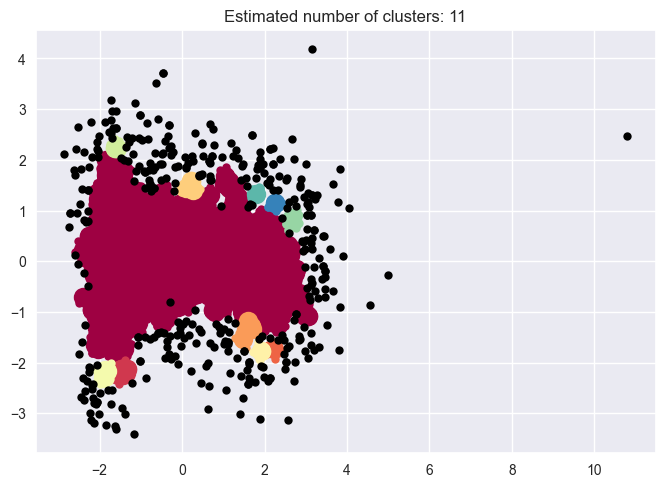

In [140]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [60]:
df = pd.DataFrame(columns=['clusters'])

In [61]:
df['clusters'] = dbscan_model.labels_

In [62]:
df

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,-1
2237,0
2238,0


In [63]:
df.value_counts()

clusters
 0          2001
-1           231
 1             8
Name: count, dtype: int64

In [64]:
silhouette_score(X_pca, df['clusters'])

np.float64(0.13868308337002014)

In [65]:
unique_labels = set(df['clusters'].to_numpy())
core_samples_mask = np.zeros_like(df['clusters'].to_numpy(), dtype=bool)
core_samples_mask[dbscan_model.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = df['clusters'].to_numpy() == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

InvalidIndexError: (slice(None, None, None), 0)